### Take the iris dataset and classify using logistic regression(one vs rest)

In [99]:
#import the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV,cross_val_score,train_test_split
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay,accuracy_score
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("datasets/iris.csv")

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df["species"].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: species, dtype: int64

In [6]:
df["species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [8]:
df.shape

(150, 5)

In [9]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [11]:
#checking for null values
df.isnull().sum()          #we don't have null values

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

<AxesSubplot:>

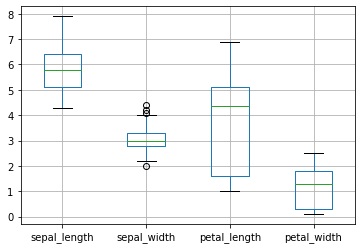

In [12]:
#checking for outliers
df.boxplot()

if we observe we only have some outliers in sepal_width column
We do have some outliers but we have just 150 recodrs and outliers are not putting a big impact so we are not going to wrangle them.

<AxesSubplot:>

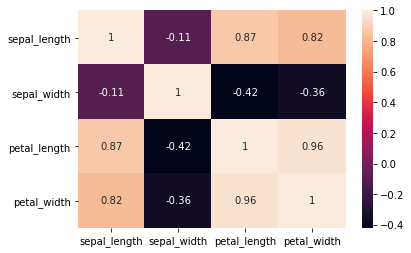

In [15]:
#correlation
sns.heatmap(df.corr(),annot=True)

A strong correlation is present between petal width and petal length.

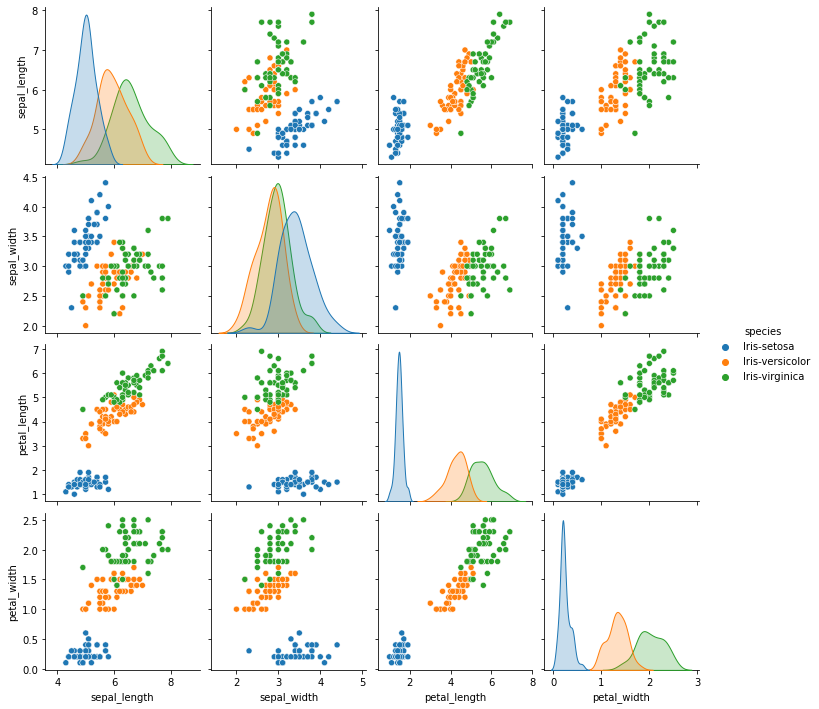

In [16]:
#pair plot
sns.pairplot(data=df,hue="species")

from this we can say that iris-versicolor and iris-virginica are overlapping

In [42]:
#dividing dataset into dependent and independent features
X=df.drop(labels="species",axis=1)
y=df["species"]

In [113]:
#splitting the dataset
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=45,stratify=None)

In [114]:
#fitting model using logistic regression
model1=LogisticRegression()

## Grid-searchCV

In [115]:
#setting params for logistic regression
params={"penalty":["l1","l2","elasticnet","none"],
        "max_iter":[100,150,200],
        "multi_class":["ovr","multinomial"],
       "C":[0.001,0.00001,0.1]}

In [116]:
model=GridSearchCV(model1,param_grid=params,cv=5)

In [117]:
model.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 1e-05, 0.1], 'max_iter': [100, 150, 200],
                         'multi_class': ['ovr', 'multinomial'],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none']})

In [118]:
#best params of the model
model.best_params_

{'C': 0.001, 'max_iter': 100, 'multi_class': 'ovr', 'penalty': 'none'}

In [119]:
model.score(x_train,y_train)

1.0

In [120]:
model.score(x_test,y_test)

0.9666666666666667

In [121]:
y_pred=model.predict(x_test)

## confusion metrics

In [122]:
confusion_matrix(y_test,y_pred)

array([[11,  0,  0],
       [ 0,  7,  0],
       [ 0,  1, 11]], dtype=int64)

In [123]:
disp = ConfusionMatrixDisplay(confusion_matrix=cf)

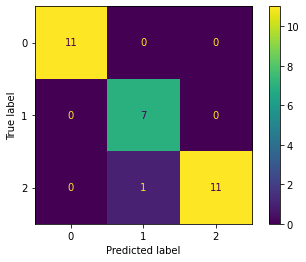

In [124]:
disp.plot()

In [125]:
accuracy_score(y_test,y_pred)

0.9666666666666667

## classification report

In [126]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.88      1.00      0.93         7
           2       1.00      0.92      0.96        12

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



## ROC-AUC-Score

In [128]:
from sklearn.metrics import roc_auc_score,roc_curve
y_pred1=model.predict_proba(x_test)
roc_auc_score(y_test,y_pred1, multi_class="ovr")

0.9855072463768115

## ROC-AUC-Curve for multi class classification

###  ROC-AUC-Curve from sklearn model only plot for binary classification ,for multiclass classification we use "YELLOWBRICK" module to plot ruc-auc-curve

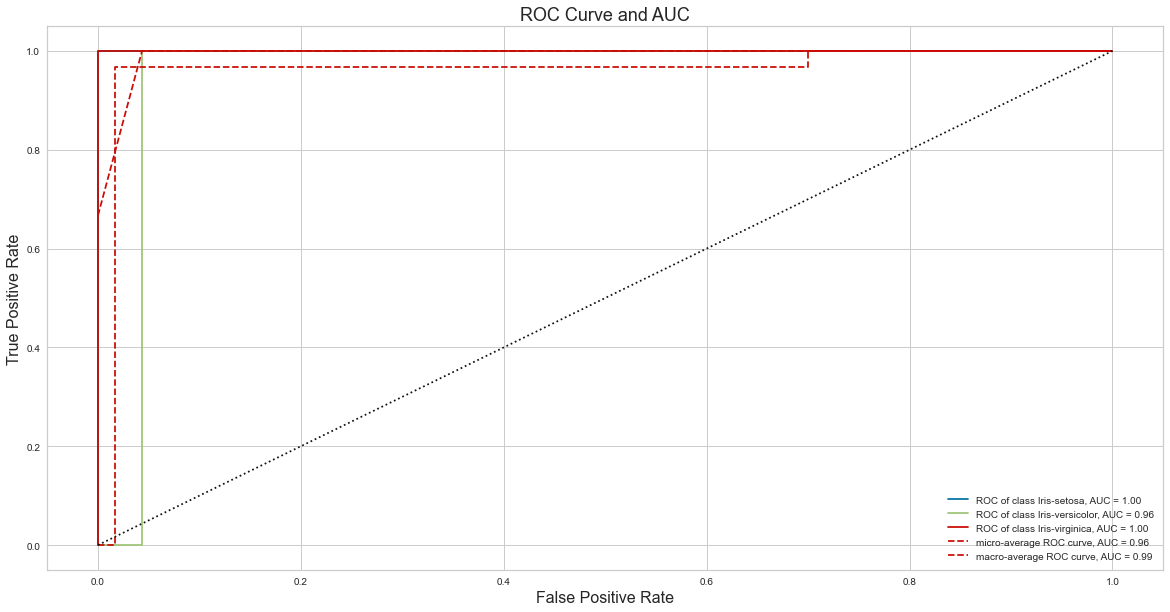

In [146]:
from yellowbrick.classifier import ROCAUC
plt.figure(figsize=(20,10))
plt.title("ROC Curve and AUC", fontsize=18)
plt.xlabel("False Positive Rate", fontsize=16)
plt.ylabel("True Positive Rate", fontsize=16)            
visualizer = ROCAUC(model, classes=["Iris-setosa", "Iris-versicolor", "Iris-virginica"])
visualizer.fit(x_train, y_train)        # Fit the training data to the visualizer
visualizer.score(x_test, y_test)# Evaluate the model on the test data
plt.legend()